# Computer Lab Exercises week 6 (SOLUTIONS)

* These lab exercises are designed to introduce the basic sy
* A screencast on downloading jupyter notebooks from the online store.
https://youtu.be/1zY7hIj5tWg
* These exercises are **not** part of the assessment of the Module.
* I will post the solutions roughly 1 week after this file has been uploaded to the DLE.
* Please first watch and work through the linkedin learning video
* Please note that pasting python from pdf can sometimes cause problems. For example quotation marks can sometimes be converted incorrectly, so then running python will cause errors.

* See https://sites.google.com/view/pythonforstemstudents/home for a collection
of links to information on python.


## Question 1  Questions about SQL

Thare is a list of SQL commands at https://www.w3schools.com/sql/sql_syntax.asp.

I also suggest you use  the command line program
https://sqlite.org/cli.html, if it is installed, to run
some of the SQL commands.

##  Question 1b) 


Download the SQLite file from **SimpleFolks for Simple SQL**
http://2016.padjo.org/files/data/starterpack/simplefolks.sqlite

You can read more about the dataset at http://2016.padjo.org/tutorials/sql-simplefolks-select-from/

The above database has the following tables:
homes, inmates, people, pets and politicians.
The people database has the column names: 
name, sex and age.

Use SQL via python to answer the following questions.


* Find all the names in the people table.
* Find all the names in the people table, for the people younger than 30 years old.
* Find all the names of the men in the people table.
* Find the average age of the people in the people table.
* Find the table names from the database file.


In [ ]:
import sqlite3
connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

# you can change the SQL command
cursor.execute("SELECT * FROM people") 
print("List the content of the people table")
result = cursor.fetchall() 
for r in result:
    print(r)


In [ ]:
#  Put your solutions here

import sqlite3

connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

##################################################
cursor.execute("SELECT name FROM people") 
print("List of all the  names")
result = cursor.fetchall() 
for r in result:
    print(r[0])


##################################################
cursor.execute("SELECT name FROM people where age < 30") 
print("List of all the  names under 30")
result = cursor.fetchall() 
for r in result:
    print(r[0])

##################################################
cursor.execute("SELECT name FROM people where sex='M' ") 
print("List of males")
result = cursor.fetchall() 
for r in result:
    print(r[0])


##################################################
cursor.execute("SELECT Avg(Age) FROM people") 
result = cursor.fetchall() 
print("Average age = ", result)

##################################################
## https://stackoverflow.com/questions/34570260/how-to-get-table-names-using-sqlite3-through-python/34570549
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
result = cursor.fetchall() 

print("The table names in the database")
for r in result:
    print(r[0])




##  Question 2: SQL and python


We have been using python to run SQL 
queries from a SQLite database. However,
we have used a separate python script for
each query. It would be better to ask the
user for the SQL query.

In [3]:
sql_ = input("Input SQL command")
print("Executing ", sql_)

Input SQL commandff
Executing  ff


Modify the cell above so the user can input an abrbitary SQL statement 
on the simplefolks.sqlite database.
Also include exception handling
to check for errors.



Please read about SQL injection attacks at
https://www.tutlane.com/tutorial/sqlite/sqlite-injection-attacks.
This is just for information.

In [ ]:
# put your solution here

In [2]:
# put your solution here

import sqlite3
connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

sql_ = input("Input SQL command")
print("Executing ", sql_)

# you can change the SQL command
try:
  cursor.execute(sql_) 
except:
    print("Error with " , sql_)


print("Results from ", sql_)
result = cursor.fetchall() 
for r in result:
    print(r)

Input SQL commandselect * from pope
Executing  select * from pope
Erroor with  select * from pope
Results from  select * from pope


##  Question 3, plotting the data from a database

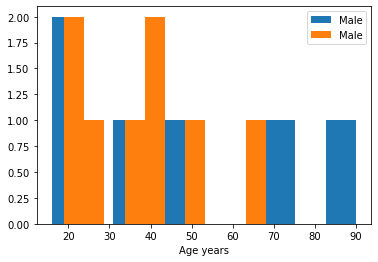

In [18]:
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

cursor.execute("SELECT age FROM people where sex='M' ") 
result = cursor.fetchall() 
male_age = []
for r in result:
    male_age.append(r[0])

cursor.execute("SELECT age FROM people where sex='F' ") 
result = cursor.fetchall() 
female_age = []
for r in result:
    female_age.append(r[0])


    
plt.hist(male_age, label="Male")
plt.hist(female_age, label="Male")
plt.xlabel("Age years")
plt.legend()
plt.show()